# 自动微分

In [1]:
import torch


## 1. 不用mean，不能求导
下面的代码会报错，在y.backward()这一行

RuntimeError: grad can be implicitly created only for scalar outputs


In [2]:
x = torch.tensor([[1,2],
                  [2,3]],dtype = float, requires_grad=True)
print(x)
y = x**2
print(y)
# y.backward()

tensor([[1., 2.],
        [2., 3.]], dtype=torch.float64, requires_grad=True)
tensor([[1., 4.],
        [4., 9.]], dtype=torch.float64, grad_fn=<PowBackward0>)


## 2. 使用mean，就可以求导了

In [3]:
x = torch.tensor([[1,2],
                  [2,3]],dtype = float, requires_grad=True)
print(x)
y = x.mean()
print(y)
y.backward()
print(x.grad)

tensor([[1., 2.],
        [2., 3.]], dtype=torch.float64, requires_grad=True)
tensor(2., dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]], dtype=torch.float64)


<b><font size=3>求导分析：</font></b>


为啥是0.25，因为平均值的公式为mean=a1/4+a2/4+a3/4+a4/4

每个元素，都假设其它元素为常量，则导数为0.25，和实际的值没有关系

## 3. 求导的计算过程
来自于这个教程的例子

https://www.pytorch123.com/SecondSection/autograd_automatic_differentiation/

In [4]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [5]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [6]:
print(y.grad_fn)


In [7]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


In [8]:
out.backward()
print(x.grad)


tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


<b><font size=3>求导分析：</font></b>


为什么是4.5，一系列运算，对应了一个公式3*(x+2)**2

求导公式可参考  程序员数学：用python学透线性代数和微积分 第 10 章　使用符号表达式
 https://docs.qq.com/doc/DVVhVcnl0Y3h2QmNj
 
也可以使用网页算https://www.wolframalpha.com/input?i=3*%28x%2B2%29**2

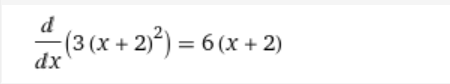

它对应的导数是6*(x+2),x=1时，值为18。平均值的导数为18/4=4.5

下面的例子也可以验证这个计算方法

In [9]:
x = torch.tensor([[1,2],
                  [2,3]],dtype = float, requires_grad=True)
y = x + 2
print(y)
z = y * y * 3
out = z.mean()

print(z, out)
out.backward()
print(x.grad)


tensor([[3., 4.],
        [4., 5.]], dtype=torch.float64, grad_fn=<AddBackward0>)
tensor([[27., 48.],
        [48., 75.]], dtype=torch.float64, grad_fn=<MulBackward0>) tensor(49.5000, dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor([[4.5000, 6.0000],
        [6.0000, 7.5000]], dtype=torch.float64)


## 4. sum求导

In [10]:
x = torch.tensor([[1,2],
                  [2,3]], dtype = float, requires_grad=True)
out = x.sum()
print(out)
out.backward()
x.grad

tensor(8., dtype=torch.float64, grad_fn=<SumBackward0>)


tensor([[1., 1.],
        [1., 1.]], dtype=torch.float64)

<b><font size=3>求导分析：</font></b>

为啥是1，因为求和的公式为sum=a1+a2+a3+a4

每个元素，都假设其它元素为常量，则导数为1

## 5. 常数和tensor的求导分析

In [11]:
x = torch.tensor(3.,requires_grad=True)
y = torch.ones(2,2,requires_grad=True)

t = x*x
z = 2*t+2*y*y
print(z)
z = z.mean() # z中所有元素的均值
print(z)
z.backward()

print(x.grad)
print(y.grad)


tensor([[20., 20.],
        [20., 20.]], grad_fn=<AddBackward0>)
tensor(20., grad_fn=<MeanBackward0>)
tensor(12.)
tensor([[1., 1.],
        [1., 1.]])


<b><font size=3>求导分析：</font></b>

根据求导网站可得求导公式https://www.wolframalpha.com/input?i=2*x**2%2B2*y**2

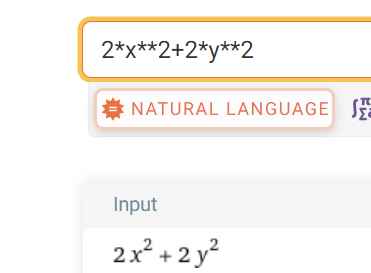

求导公式为


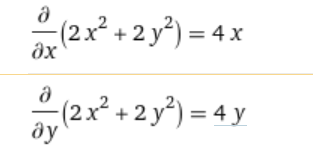

<b><font size=3>所以：</font></b>

x.grad=12, 根据x的求导公式4*x，当x=3时，就计算出了12

y.grad=1, 根据y的求导公式4*y,当y=1时，得4，然后除以4，就得1

## 6. 两个tensor的求导分析

In [12]:
x = torch.tensor([[1,2],
                  [2,3]],dtype = float,requires_grad=True)
y = torch.ones(2,2,requires_grad=True)

t = x*x
z = 2*t+2*y*y
print('z:',z)
z = z.mean() # z中所有元素的均值
print('z.mean:',z)
z.backward()

print(x.grad)
print(y.grad)

z: tensor([[ 4., 10.],
        [10., 20.]], dtype=torch.float64, grad_fn=<AddBackward0>)
z.mean: tensor(11., dtype=torch.float64, grad_fn=<MeanBackward0>)
tensor([[1., 2.],
        [2., 3.]], dtype=torch.float64)
tensor([[1., 1.],
        [1., 1.]])


<b><font size=3>求导分析：</font></b>

x.grad, 根据x的求导公式4*x，当x=1时，就计算出了4,然后除以4为1，同理得其它

y.grad=1, 根据y的求导公式4*y,当y=1时，得4，然后除以4，就得1